Here is the rubric I will be using to grade Lab 3.  You must have these exact sections in your project, if you want me to grade it!  Lab 3 is due Sunday, 11/28/2021 by 11:59PM.

Category |Available |Requirements
-----|-----|----- 
Total Points | 100 | 
Business Understanding 1 |10|Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
Data Understanding 1 | 10 |Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
Data Understanding 2|10|Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
Modeling and Evaluation 1|10|Train and adjust parameters
Modeling and Evaluation 2|10|Evaluate and Compare
Modeling and Evaluation 3|10|Visualize Results
Modeling and Evaluation 4|20|Summarize the Ramifications
Deployment|10|Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
Exceptional Work|10|You have free reign to provide additional analyses or combine analyses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Business Understanding 1

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

# Data Understanding 1

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [2]:
hotel = pd.read_csv("data/hotel_bookings.csv",low_memory=False)

In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Description

Variable |Type |Description | Further Description
-----|-----|-----|----|
ADR | Numeric | Average Daily Rate |  
Adults | Integer | Number of adults
Agent | Categorical | ID of the travel agency that made the booking
ArrivalDateDayOfMonth | Categorical | Day of the month of the arrival date
ArrivalDateMonth | Numeric | Month of arrival date with 12 categories: “January” to “December”
ArrivalDateWeekNumber | Numeric | Week number of the arrival date
ArrivalDateYear | Numeric | Year of arrival date
AssignedRoomType | Numeric | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
Babies | Integer | Number of babies
BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
Children | Integer | Number of children
Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. 
Country | Categorical | Country of origin.
CustomerType | Categorical | Type of booking. | Assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is asso- ciated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer
DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. | This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
DistributionChannel | Integer | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0)
IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0)
LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
MarketSegment | Categorical | Market segment designation. | In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
Meal | Categorical | Type of meal booked. Categories are presented in standard hospitality meal packages: | Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
PreviousBookingsNotCanceled | Integer | Number of previous bookings that were NOT cancelled by the customer prior to the current booking
PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking
RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer
ReservationStatus | Categorical | Reservation last status | assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
ReservationStatusDate | Date | Reservation last status | Date at which the last status was set |
ReservedRoomType | Categorical | Reservation last status | Code of room type reserved. |
StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor)|





One hot encode "hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type' but first make sure you check for dups

drop company column and reservation_status_date

remove NA rows for agent

In [4]:
# dropping company column as there isn't enough data 
del hotel['company']
del hotel['country']

In [5]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
pd.set_option("display.max_rows", 531)

In [7]:
hotel[["agent","is_canceled"]].value_counts().reset_index().sort_values(by="agent",ascending=False)

,agent,is_canceled,0
392,535.0,0,3
244,531.0,0,22
155,531.0,1,46
192,527.0,0,35
458,526.0,1,1
317,526.0,0,9
409,510.0,0,2
332,509.0,0,8
410,509.0,1,2
356,508.0,0,6


In [8]:
hotel["is_canceled"].value_counts().reset_index().sort_values(by="is_canceled",ascending=False)

,index,is_canceled
0,0,75166
1,1,44224


#### Checking for duplicates

In [9]:
pd.set_option("display.max_columns", 101)

In [10]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


#### Dropping NA values from agent 

the loss of data is not significant

In [11]:
hotel.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0


In [12]:
hotel=hotel.dropna(subset=['agent',"children"])

In [13]:
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Data Understanding 2

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

## What type of hotel has more bookings?

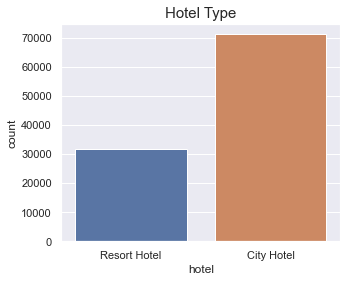

In [15]:
# Count of hotel types?
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=hotel, x = 'hotel')
plt.show()

From the graph above, majority of the bookings were made in city hotels. This could be because city hotels tend to be cheaper, everything is more accessible for individuals or small groups of visitors. Resort prices could reduce the price to increase bookings.

## Which are the most busy months?

Text(0, 0.5, 'Count')

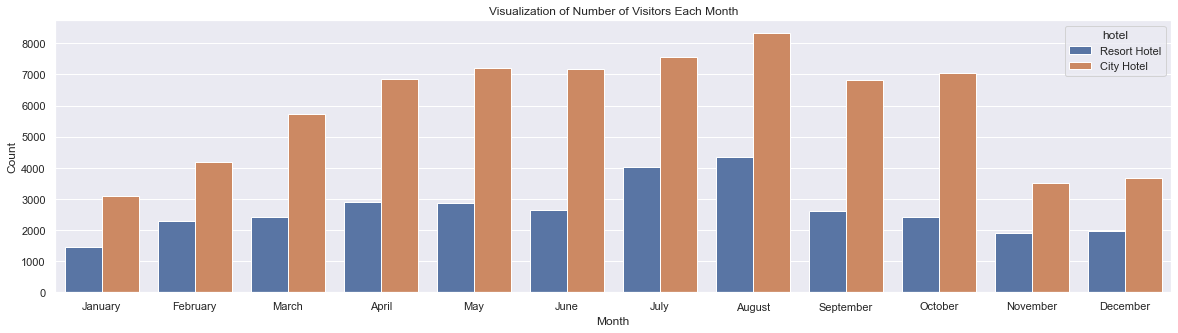

In [15]:
#Which are the most busy months?
plt.figure(figsize=(20,5))

# data we will use in a list
l2 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hotel[l2],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Visualization of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

From the graph above, we can see that August is the busiest month for both City hotels and Resort hotels whereas bookings are lowest during January for both types of hotels. This could be because of weather conditions as people prefer going for vacation during more comfortable seasons such as Spring or Summer and not during Winter.

## Cancellation rates in the two types of hotels

/Users/nnennaokpara/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bookings Cancelled')

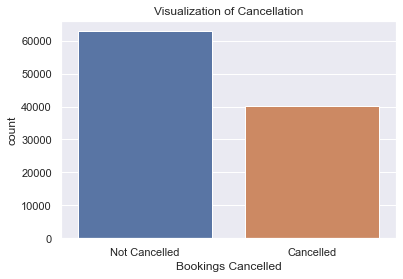

In [22]:
#Replace the 1s and 0s in the is_cancelled column to cancelled and not cancelled
hotel['is_canceled'] = hotel.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
cancelled_data = hotel['is_canceled']

# Plotting
sns.countplot(cancelled_data).set_title("Visualization of Cancellation")
plt.xlabel("Bookings Cancelled")

From the graph above, We can see that more than 60% of the bookings were not cancelled.

Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

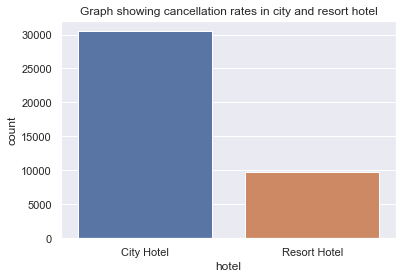

In [18]:
# Let's look into how much of bookings were cancelled in each type of hotel
lst2 = ['is_canceled', 'hotel']
type_of_hotel_canceled = hotel[lst2]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
canceled_hotel
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')

From the cancellation graph showing the hotel types, we can see that city hotels have three times more cancellations than resort hotels and that is because city hotels have more bookings as we have seen earlier.

## Who travels and in which group?

[Text(0.5, 1.0, 'Number of children'),
 Text(551.7838235294118, 0.5, 'Total number'),
 Text(0.5, 21.5, 'Group size')]

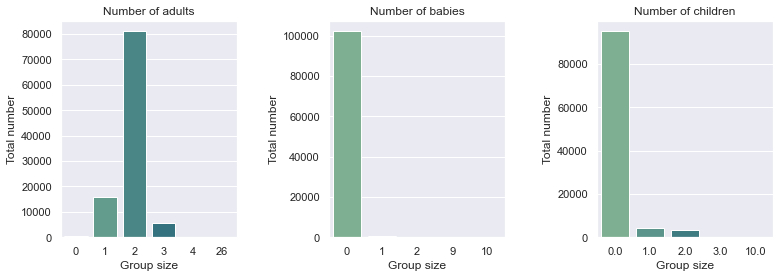

In [23]:
hotel_num = hotel[["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"]]
fig, ax = plt.subplots(1,3,figsize=(12,5))
fig.tight_layout(pad=5.0)
sns.countplot(x=hotel_num.adults, ax=ax[0], palette="crest").set(title="Number of adults", ylabel="Total number", xlabel="Group size")

sns.countplot(x=hotel_num.babies, ax=ax[1], palette="crest").set(title="Number of babies", ylabel="Total number", xlabel="Group size")

sns.countplot(x=hotel_num.children, ax=ax[2], palette="crest").set(title="Number of children", ylabel="Total number", xlabel="Group size")

From the graphs above, we can see that most reservations were made by adults without children or babies. Approximately 74% of adults travel with another adult, most likely the two adults are couples travel together. Travelling with babies or children is rare. From the graph "Number of adults" we can see that there is a column 0, this could be that the bookings were made by teenagers and young adults (below 18 years old), who travel alone or with friends/ spouse.

## Lead time (the number of days from booking to arrival date), Booking changes

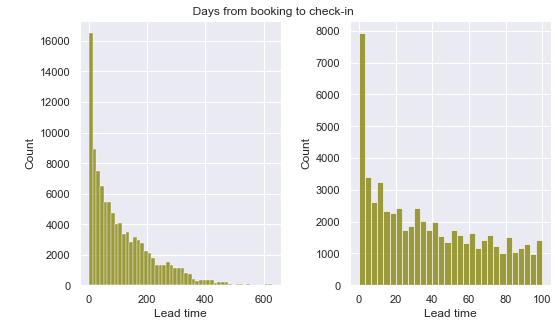

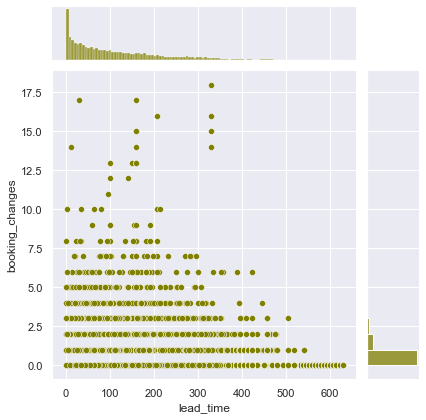

In [21]:
days_to_dep_list = []

for days in hotel_num["lead_time"]:
    if days <= 100:
        days_to_dep_list.append(days)

fig, ax = plt.subplots(1,2, figsize=(8,5))
fig.tight_layout(pad=3)
    
sns.histplot(hotel_num.lead_time, bins=50, color="olive", ax=ax[0]).set(xlabel= "Lead time",title="                                                       Days from booking to check-in")
sns.histplot(days_to_dep_list, bins=30, color="olive", ax=ax[1]).set(xlabel="Lead time")
sns.jointplot(x=hotel.lead_time, y=hotel.booking_changes, color="olive")

From the graph above, we can see that It seems the longer people book in advance the less they are likely to change their original reservation.

## Correlations of Variables

<AxesSubplot:>

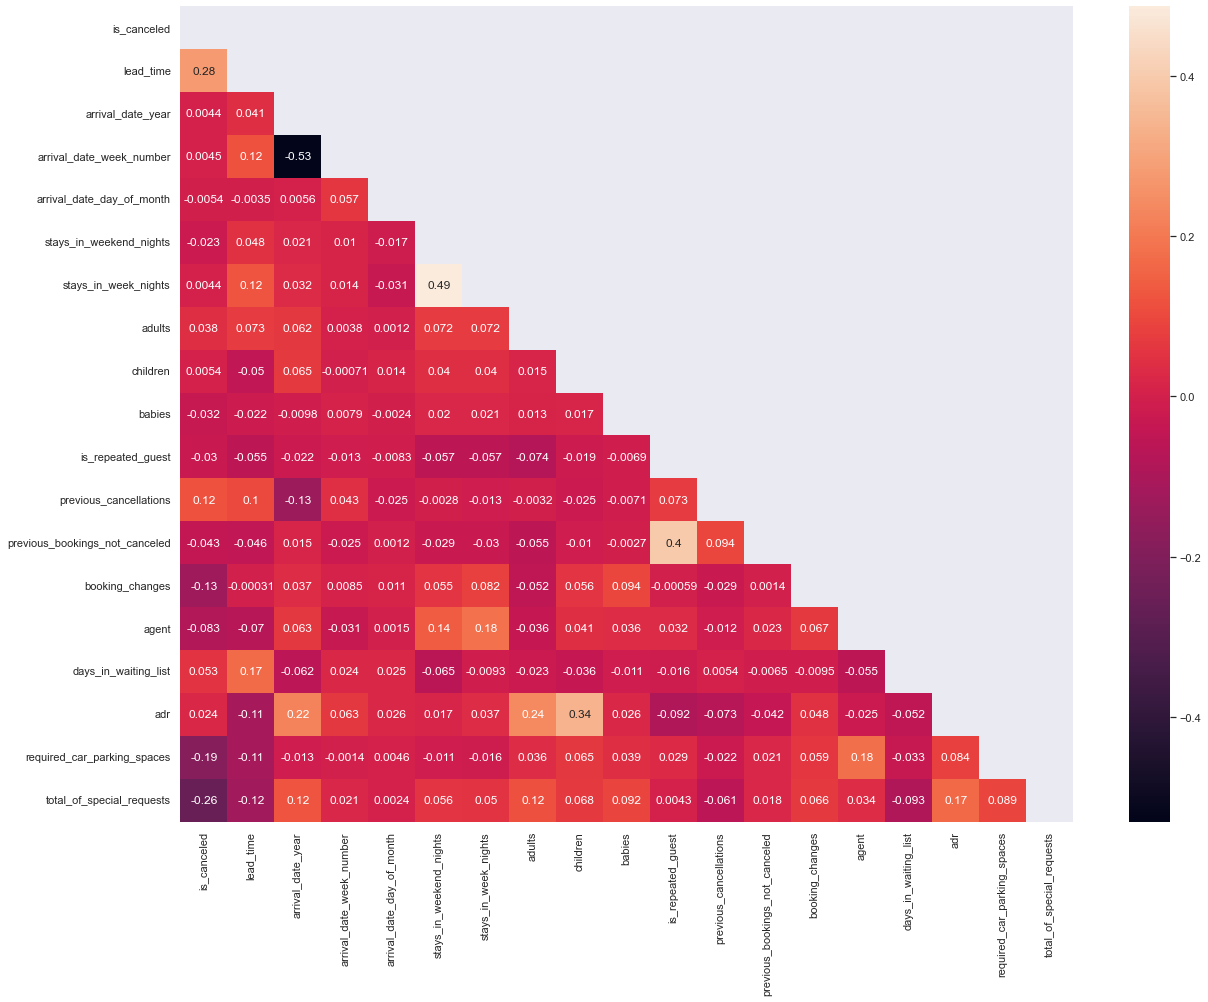

In [26]:
plt.figure(figsize=(20,15))

corr= hotel.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

<AxesSubplot:>

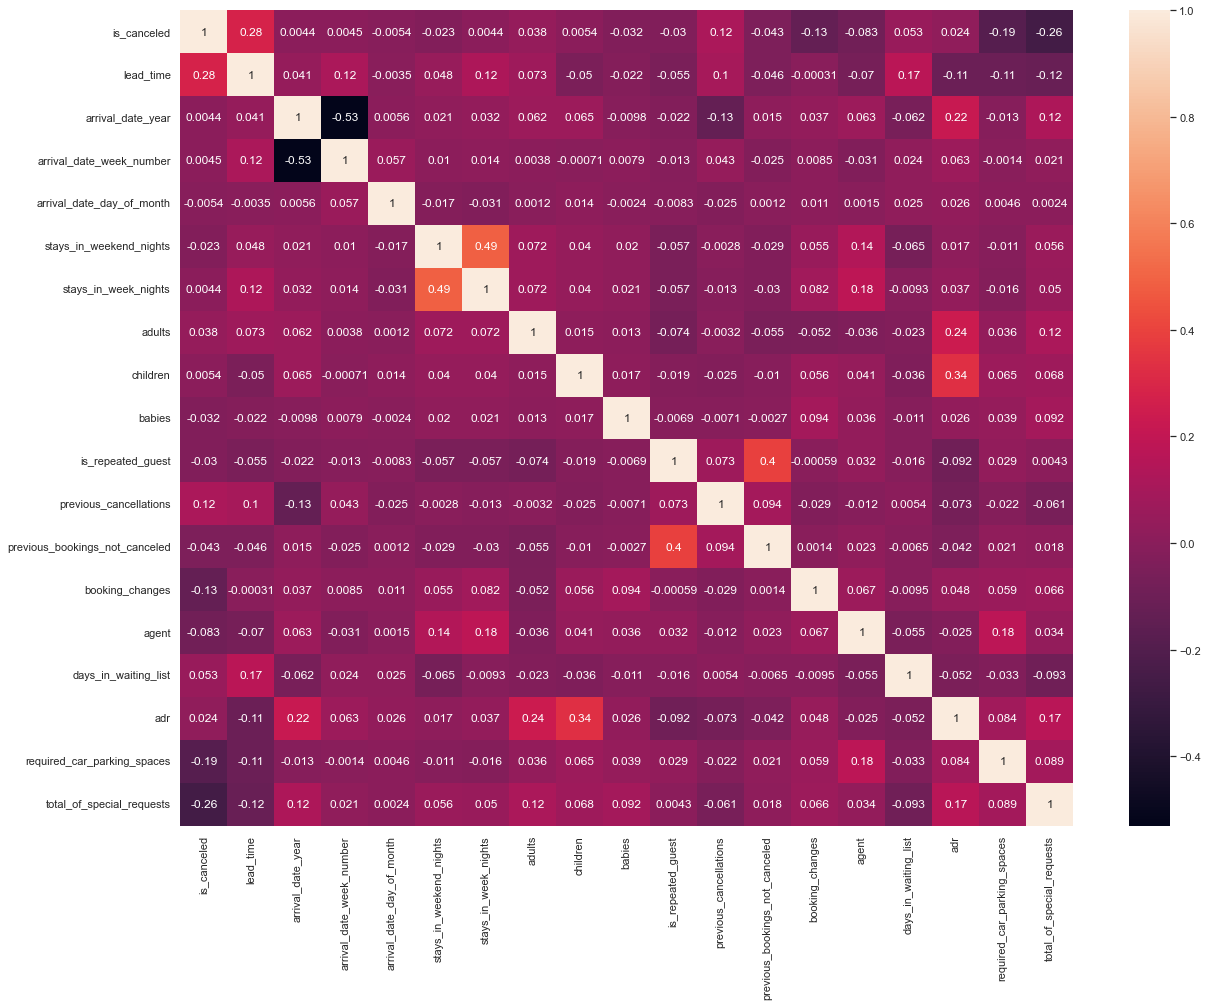

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(hotel.corr(),annot=True)

From the plots, We see lot of correlation among the following variables:
stays_in_week_nights & stays_in_weekend_nights are highly correlated. 
Arrival_date_week_number & arrival_date_year are negatively correlated.
Previous_booking_not_cancelled & Is_repeated_guest are positvely correlated.

Converted arrival_date_month to a numerical variable

In [28]:
hotel["arrival_date_month"] = hotel["arrival_date_month"].replace({"January":1,"February":2,
                                                                  "March":3,"April":4,
                                                                  "May":5,"June":6,
                                                                  "July":7,"August":8,
                                                                  "September":9,"October":10,
                                                                  "November":11,"December":12})

Removed the reservation_status and reservation_status_date because of multicolinearity with the response variable is_cancelled.

In [29]:
new_hotel = hotel.drop(columns=["reservation_status","reservation_status_date"])

In [30]:
new_hotel.reset_index(inplace=True,drop=True)

In [31]:
new_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103048 entries, 0 to 103047
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103048 non-null  object 
 1   is_canceled                     103048 non-null  int64  
 2   lead_time                       103048 non-null  int64  
 3   arrival_date_year               103048 non-null  int64  
 4   arrival_date_month              103048 non-null  int64  
 5   arrival_date_week_number        103048 non-null  int64  
 6   arrival_date_day_of_month       103048 non-null  int64  
 7   stays_in_weekend_nights         103048 non-null  int64  
 8   stays_in_week_nights            103048 non-null  int64  
 9   adults                          103048 non-null  int64  
 10  children                        103048 non-null  float64
 11  babies                          103048 non-null  int64  
 12  meal            

In [32]:
new_hotel["is_canceled"].value_counts()

0    62856
1    40192
Name: is_canceled, dtype: int64

In [33]:
(62856)/(62856+40192)

0.6099681701731232

In [34]:
(40192)/(62856+40192)

0.3900318298268768

#### One hot encoding

"hotel", 'arrival_date_month', 'customer_type', 'reservation_status', 'deposit_type'

In [35]:
#One hot encode specific columns without standardizing and scaling continuous variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["hotel", 'meal','market_segment','distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type']

ohe = OneHotEncoder(drop="first")

hotel_object = new_hotel.select_dtypes('object')
ohe.fit(hotel_object)

codes = ohe.transform(hotel_object).toarray()
feature_names = ohe.get_feature_names(categorical_features)

new_hotel = pd.concat([new_hotel.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)


In [36]:
new_hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,9,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0,103.0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,85,2015,7,27,1,0,3,2,0.0,0,0,0,0,0,240.0,0,82.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
X = new_hotel.drop("is_canceled",axis=1)

### Standard Scaling All Continuous Variables

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
continuous_variables = ['lead_time',"arrival_date_month",'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                        'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                        'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
                        'total_of_special_requests']
stdsclr = StandardScaler()

X[continuous_variables] = stdsclr.fit_transform(X[continuous_variables])

In [39]:
X

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.916443,-1.637622,0.134327,-0.025542,-1.681174,-0.974046,-0.833968,-1.831699,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,1.961688,-0.139253,-0.591999,-0.235772,-0.757451,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.907156,-1.637622,0.134327,-0.025542,-1.681174,-0.974046,-0.309241,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,1.383938,-0.139253,-0.132310,-0.235772,0.493772,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.907156,-1.637622,0.134327,-0.025542,-1.681174,-0.974046,-0.309241,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,1.383938,-0.139253,-0.132310,-0.235772,0.493772,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.953593,-1.637622,0.134327,-0.025542,-1.681174,-0.974046,-0.309241,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,1.952660,-0.139253,-0.032378,-0.235772,0.493772,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.247739,-1.637622,0.134327,-0.025542,-1.681174,-0.974046,0.215486,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,1.383938,-0.139253,-0.452094,-0.235772,0.493772,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103043,-0.823568,1.194385,0.465408,0.576631,1.616540,1.018124,1.264940,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,2.774148,-0.139253,-0.169485,-0.235772,-0.757451,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
103044,-0.089851,1.194385,0.465408,0.576631,1.730254,1.018124,1.264940,2.241167,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,-0.701378,-0.139253,2.414568,-0.235772,1.744994,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
103045,-0.721405,1.194385,0.465408,0.576631,1.730254,1.018124,1.264940,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,-0.701378,-0.139253,1.061083,-0.235772,4.247439,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
103046,-0.024838,1.194385,0.465408,0.576631,1.730254,1.018124,1.264940,0.204734,-0.269884,-0.079221,-0.119256,-0.101911,-0.05694,-0.32283,0.020809,-0.139253,-0.004397,-0.235772,-0.757451,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
y = new_hotel["is_canceled"].values

# Modeling and Evaluation 1

train and adjust parameters (GridSearch)

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

In [42]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

In [43]:
%%time
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)

EvaluateClassifierEstimator(clf, X, y, cv)

The average accuracy for all cv folds is: 			 0.79937
The average precision for all cv folds is: 			 0.8169
The average recall for all cv folds is: 			 0.62596
*********************************************************
Cross Validation Fold Mean Error Scores
CPU times: user 1min 59s, sys: 25.7 s, total: 2min 24s
Wall time: 22.6 s


,Accuracy,Precision,Recall
0,0.796070,0.808459,0.625327
1,0.799321,0.818093,0.624331
2,0.798690,0.815235,0.625700
3,0.798836,0.819885,0.620600
4,0.799272,0.816105,0.626570
5,0.801989,0.820746,0.629929
6,0.798447,0.816420,0.623461
7,0.802086,0.819767,0.631422
8,0.796846,0.812459,0.622963
9,0.802183,0.821800,0.629307


### Using clustering to feature engineer

In [44]:
continuous_X = X[['lead_time',"arrival_date_month",'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                        'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                        'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
                        'total_of_special_requests']]

In [45]:
continuous_X.reset_index(inplace=True,drop=True)

In [46]:
continuous_X.describe()

,lead_time,arrival_date_month,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05,1.030480e+05
mean,-2.892706e-14,4.924042e-15,1.447452e-13,6.416934e-15,-8.500045e-16,-3.501875e-14,3.492654e-14,1.147019e-14,1.649756e-15,-1.868034e-14,1.526733e-14,-3.947059e-14,9.459992e-15,8.503835e-15,-1.224489e-14,1.468561e-14,-1.116229e-14,-7.482083e-14,-8.765707e-14
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.037181e+00,-1.852158e+00,-1.637622e+00,-1.982601e+00,-1.681174e+00,-9.740464e-01,-1.358695e+00,-3.868132e+00,-2.698842e-01,-7.922076e-02,-1.192561e-01,-1.019109e-01,-5.694019e-02,-3.228297e-01,-7.735966e-01,-1.392528e-01,-2.218500e+00,-2.357717e-01,-7.574505e-01
25%,-7.957050e-01,-8.589154e-01,-2.216181e-01,-7.782570e-01,-8.851744e-01,-9.740464e-01,-8.339679e-01,2.047342e-01,-2.698842e-01,-7.922076e-02,-1.192561e-01,-1.019109e-01,-5.694019e-02,-3.228297e-01,-7.013778e-01,-1.392528e-01,-6.359697e-01,-2.357717e-01,-7.574505e-01
50%,-3.034646e-01,1.343273e-01,-2.216181e-01,4.972984e-02,2.453981e-02,2.203900e-02,-3.092410e-01,2.047342e-01,-2.698842e-01,-7.922076e-02,-1.192561e-01,-1.019109e-01,-5.694019e-02,-3.228297e-01,-6.562411e-01,-1.392528e-01,-1.662872e-01,-2.357717e-01,-7.574505e-01
75%,5.324152e-01,7.964891e-01,1.194385e+00,8.024451e-01,9.342541e-01,1.018124e+00,2.154859e-01,2.047342e-01,-2.698842e-01,-7.922076e-02,-1.192561e-01,-1.019109e-01,-5.694019e-02,-3.228297e-01,1.284637e+00,-1.392528e-01,4.632872e-01,-2.357717e-01,4.937720e-01
max,4.804690e+00,1.789732e+00,1.194385e+00,1.931518e+00,1.730254e+00,1.496332e+01,2.015511e+01,4.907913e+01,2.401286e+01,1.029958e+02,8.385314e+00,3.421311e+01,1.144546e+02,2.848666e+01,4.047004e+00,2.067681e+01,1.058361e+02,1.305515e+01,5.498662e+00


In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

X1 = X[['stays_in_weekend_nights','stays_in_week_nights']]

cls = KMeans(n_clusters=10, init='k-means++',random_state=1)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

y = new_hotel['is_canceled']
X_change = X.drop([['stays_in_weekend_nights','stays_in_week_nights']],axis=1)
X_new = np.column_stack((X_change,pd.get_dummies(newfeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy (with kmeans for stays_in_weekend_nights, and stays_in_week_nights)= ", acc.mean()*100, "+-", acc.std()*100)

# Modeling and Evaluation 2

evaluate and compare

# Modeling and Evaluation 3

Visualize

# Modeling and Evaluation 4

Summarize and ramifications

# Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?


# Exceptional Work

You have free reign to provide additional analyses or combine analyses.